## Importing Libs.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import codecs
import re
from time import sleep
import time
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import numpy as np

## Reading HTML File and Extracting Links

In [2]:
file = codecs.open("link.html", "r", "utf-8")

# creating soup object
page_content = file.read()
soup = BeautifulSoup(page_content,features= 'lxml') #'html.parser')
links = [link.get_text() for link in soup.find_all("span", {"class":"topRankingGrid-titleName"})]

links


['instructure.com',
 'brainly.co.id',
 'quizlet.com',
 'blackboard.com',
 'quizizz.com',
 'scribd.com',
 'udemy.com',
 'schoology.com',
 'brainly.lat',
 'brainly.in',
 'clever.com',
 'grammarly.com',
 'gdz.ru',
 'duolingo.com',
 'toppr.com',
 'chegg.com',
 'librus.pl',
 'brainly.com.br',
 'index-education.net',
 'wordwall.net',
 'bbcollab.com',
 'khanacademy.org',
 'liveworksheets.com',
 'academia.edu',
 'byjus.com',
 'yt1s.com',
 'unam.mx',
 'dnevnik.ru',
 'coursera.org',
 'coursehero.com',
 'padlet.com',
 'pearson.com',
 'znanija.com',
 'vedantu.com',
 'learncbse.in',
 'uchi.ru',
 'mheducation.com',
 'vietjack.com',
 'cengage.com',
 'powerschool.com',
 'school.mosreg.ru',
 'mathway.com',
 'brightspace.com',
 'k12.com',
 'myflixer.to',
 'brainly.com',
 'classdojo.com',
 'ecollege.com',
 'collegeboard.org',
 'iauec.ac.ir']

## Applying Scraping!

In [3]:
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_5) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.1.1 Safari/605.1.15'}
count = 1
dic = {}
for i in links:
    url = 'https://'+i
    sleep(1)
    try:
        response = requests.get(url,headers=headers)
        soup = BeautifulSoup(response.content, features = 'lxml')
        article = soup.get_text()

        #remove all single characters
        article = re.sub(r'\s+[a-zA-Z]\s',' ',article)

        #subtituting multiple spaces with single space 
        article = re.sub(r'\s+',' ', article, flags=re.I)
        article = np.array(article)

        dic[f'article_{count}'] = article
        count = count+1
    except:
        count = count+1
        continue
        

In [6]:
#dic

In [7]:
dic['article_1']

array(' Instructure Learning Platform | Educational Software Development Skip to main content Close modal Select your locationAmericasNorth AmericaEnglish BrazilPortuguês Latin AmericaEspañol Asia PacificAustraliaEnglish EuropeGermanyDeutsch SpainEspañol United KingdomEnglish BeneluxDutch North America Reset language preference Clear redirect preference Utility Try Canvas Free Corp Edu Support Contact Us Log In Canvas Canvas Credentials Student ePortfolio Mastery Connect Elevate Data Sync Main K-12 K-12 SOLUTIONS Column Canvas The hub of your digital classroom that serves as the foundation for teaching and learning. Canvas LMS Canvas Studio Canvas Catalog Canvas Credentials Try Canvas Free Column Mastery The assessment tools and quality content educators need to accelerate learning forward. Mastery Connect Mastery Item Bank Mastery View Formative Assessments Mastery View Predictive Assessments Column Elevate Powerful analytical tools that provide actionable insights for making impactfu

## Creating DataFrame from the Dictionary

In [8]:
df = pd.DataFrame.from_records([(dic)])
df = df.transpose()
df.columns = ['Raw_Data']
df

,Raw_Data
article_1,Instructure Learning Platform | Educational S...
article_2,Brainly.co.id - Jaringan Pembelajaran SosialDa...
article_3,Captcha Challenge… One more step… The securit...
article_5,Quizizz | Where motivation meets mastery 📣 Lo...
article_7,Just moment... Enable JavaScript and cookies ...
article_8,
article_9,brainly.latPlease enable JS and disable any ad...
article_10,brainly.inPlease enable JS and disable any ad ...
article_12,Grammarly: Free Online Writing AssistantGramma...
article_13,Just moment... Enable JavaScript and cookies ...


## Saving the Result into .CSV File

In [9]:
df.to_csv('Tics_aasignment_3.csv')

## Importing Libs. 

In [12]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from textblob import TextBlob


#### Taking Text from the previous DataFrame

In [13]:
test = str(df.iloc[0][0])
test

' Instructure Learning Platform | Educational Software Development Skip to main content Close modal Select your locationAmericasNorth AmericaEnglish BrazilPortuguês Latin AmericaEspañol Asia PacificAustraliaEnglish EuropeGermanyDeutsch SpainEspañol United KingdomEnglish BeneluxDutch North America Reset language preference Clear redirect preference Utility Try Canvas Free Corp Edu Support Contact Us Log In Canvas Canvas Credentials Student ePortfolio Mastery Connect Elevate Data Sync Main K-12 K-12 SOLUTIONS Column Canvas The hub of your digital classroom that serves as the foundation for teaching and learning. Canvas LMS Canvas Studio Canvas Catalog Canvas Credentials Try Canvas Free Column Mastery The assessment tools and quality content educators need to accelerate learning forward. Mastery Connect Mastery Item Bank Mastery View Formative Assessments Mastery View Predictive Assessments Column Elevate Powerful analytical tools that provide actionable insights for making impactful deci

## Applying Sentence Tokenization

In [16]:
#sent_tokenize(test)

## Applying Word Tokenization

In [18]:
#word_tokenize(test)

## Applying Word Tokenization using TextBlob Lib.

In [20]:
test2 = TextBlob(test)
#test2.sentences

## Checking polarity and Subjectivity

In [21]:
TextBlob(str(df.iloc[0][0])).sentiment

Sentiment(polarity=0.28869458128078823, subjectivity=0.4187316849816849)

## TfidfVectorizer

In [23]:
#tfidfconverter = TfidfVectorizer(ngram_range=(1,3), max_features=1500, min_df=5, max_df=0.7,  stop_words=stopwords.words('english'))
#tfidfconverter

## Converting Text in DataFrame to string

In [24]:
for i in range(len(df)):
    df.iloc[i] = str(df.iloc[i])

In [26]:
#X = tfidfconverter.fit_transform(df["Raw_Data"]).toarray()

## Getting name of the features

In [ ]:
tfidfconverter.get_feature_names()

## Frequency Distriibution

In [27]:
fdist = FreqDist()

In [28]:
for x in str(df["Raw_Data"]).split():
    fdist[x]+=1
    
len(fdist)

201

## Most Common 50 Words

In [29]:
fdist.most_common(50)

[('Raw_Data', 42),
 ('...', 13),
 ('|', 12),
 ('-', 8),
 ('Online', 7),
 ('enable', 5),
 ('JS', 5),
 ('and', 5),
 ('Learning', 3),
 ('Just', 3),
 ('moment...', 3),
 ('Enable', 3),
 ('JavaScript', 3),
 ('di...', 3),
 ('Platform', 2),
 ('\\nName:', 2),
 ('dtype:', 2),
 ('object', 2),
 ('Free', 2),
 ('to', 2),
 ('Courses', 2),
 ('Security', 2),
 ('check', 2),
 ('College', 2),
 ('article_1', 1),
 ('Instructure', 1),
 ('E...', 1),
 ('article_2', 1),
 ('Brainly.co.id', 1),
 ('Jaringan', 1),
 ('Pembelaja...', 1),
 ('article_3', 1),
 ('Captcha', 1),
 ('Challenge…', 1),
 ('One', 1),
 ('more', 1),
 ('step…...', 1),
 ('article_5', 1),
 ('Quizizz', 1),
 ('Where', 1),
 ('motivation', 1),
 ('meets', 1),
 ('article_7', 1),
 ('article_8', 1),
 ('article_8,', 1),
 ('article_9', 1),
 ('brainly.latPlease', 1),
 ('article_10', 1),
 ('brainly.inPlease', 1),
 ('dis...', 1)]

## Creating Columns of Polarity and Subjectivity

In [30]:
df['polarity']     = df['Raw_Data'].apply(lambda x : TextBlob(x).sentiment[0])
df['subjectivety'] = df['Raw_Data'].apply(lambda x : TextBlob(x).sentiment[1])

In [31]:
df.head()

,Raw_Data,polarity,subjectivety
article_1,Raw_Data Instructure Learning Platform | E...,0.25,0.25
article_2,Raw_Data Brainly.co.id - Jaringan Pembelaja...,0.00,0.00
article_3,Raw_Data Captcha Challenge… One more step…...,0.50,0.50
article_5,Raw_Data Quizizz | Where motivation meets ...,0.00,0.00
article_7,Raw_Data Just moment... Enable JavaScript ...,0.00,0.00


In [32]:
len(df["Raw_Data"][:])

42

## Downloading "vader_lexicon" for Sentimental Analysis

In [33]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\X1-Carbon\AppData\Roaming\nltk_data...


## Creating Instance 

In [34]:
SA = SentimentIntensityAnalyzer()

## Empty Dataframe to store Sentiments 

In [35]:
df2 = pd.DataFrame(columns=['neg', 'neu', 'pos','compound'])

## Calculating Sentiemnts and Storing Them in the df2

In [36]:
for i in range(len(df)):
    dic = SA.polarity_scores(df["Raw_Data"][i])
    temp_df = pd.DataFrame(dic, index=[0])
    df2 = df2.append(temp_df)
    

C:\Users\X1-Carbon\AppData\Local\Temp\ipykernel_16512\2769747363.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp_df)
C:\Users\X1-Carbon\AppData\Local\Temp\ipykernel_16512\2769747363.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp_df)
C:\Users\X1-Carbon\AppData\Local\Temp\ipykernel_16512\2769747363.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp_df)
C:\Users\X1-Carbon\AppData\Local\Temp\ipykernel_16512\2769747363.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(temp_df)
C:\Users\X1-Carbon\AppData\Local\Temp\ipykernel_16512\2769747363.py:4: F

In [37]:
df2 = df2.reset_index() 
del df2['index']

In [38]:
df2.head(10)

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,1.000,0.000,0.0000
2,0.0,1.000,0.000,0.0000
3,0.0,0.806,0.194,0.3400
4,0.0,1.000,0.000,0.0000
5,0.0,1.000,0.000,0.0000
6,0.0,1.000,0.000,0.0000
7,0.0,1.000,0.000,0.0000
8,0.0,0.732,0.268,0.5106
9,0.0,1.000,0.000,0.0000


## Adding df2 (Sentiment's DataFrame) to df (Main DataFrame)

In [39]:
for i in df2.columns:
    df[i] = list(df2[i])

In [40]:
df.head()

,Raw_Data,polarity,subjectivety,neg,neu,pos,compound
article_1,Raw_Data Instructure Learning Platform | E...,0.25,0.25,0.0,1.000,0.000,0.00
article_2,Raw_Data Brainly.co.id - Jaringan Pembelaja...,0.00,0.00,0.0,1.000,0.000,0.00
article_3,Raw_Data Captcha Challenge… One more step…...,0.50,0.50,0.0,1.000,0.000,0.00
article_5,Raw_Data Quizizz | Where motivation meets ...,0.00,0.00,0.0,0.806,0.194,0.34
article_7,Raw_Data Just moment... Enable JavaScript ...,0.00,0.00,0.0,1.000,0.000,0.00


## Length of each Article

In [41]:
length = []

for i in df['Raw_Data']:
    length.append(len(i))

In [42]:
df['Length'] = length

In [43]:
df.head()

,Raw_Data,polarity,subjectivety,neg,neu,pos,compound,Length
article_1,Raw_Data Instructure Learning Platform | E...,0.25,0.25,0.0,1.000,0.000,0.00,92
article_2,Raw_Data Brainly.co.id - Jaringan Pembelaja...,0.00,0.00,0.0,1.000,0.000,0.00,92
article_3,Raw_Data Captcha Challenge… One more step…...,0.50,0.50,0.0,1.000,0.000,0.00,92
article_5,Raw_Data Quizizz | Where motivation meets ...,0.00,0.00,0.0,0.806,0.194,0.34,92
article_7,Raw_Data Just moment... Enable JavaScript ...,0.00,0.00,0.0,1.000,0.000,0.00,92


## Class Label

In [44]:
label = []
for i in range(len(df)):
    if(df['polarity'][i] < 0.5):
        label.append('Low')
    else:
        label.append('High')

In [45]:
df['Label'] = label

In [46]:
df.head()

,Raw_Data,polarity,subjectivety,neg,neu,pos,compound,Length,Label
article_1,Raw_Data Instructure Learning Platform | E...,0.25,0.25,0.0,1.000,0.000,0.00,92,Low
article_2,Raw_Data Brainly.co.id - Jaringan Pembelaja...,0.00,0.00,0.0,1.000,0.000,0.00,92,Low
article_3,Raw_Data Captcha Challenge… One more step…...,0.50,0.50,0.0,1.000,0.000,0.00,92,High
article_5,Raw_Data Quizizz | Where motivation meets ...,0.00,0.00,0.0,0.806,0.194,0.34,92,Low
article_7,Raw_Data Just moment... Enable JavaScript ...,0.00,0.00,0.0,1.000,0.000,0.00,92,Low


# Visualization

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import spacy
from spacy import displacy
#import en_core_web_sm
nlp=spacy.load("en_core_web_sm")


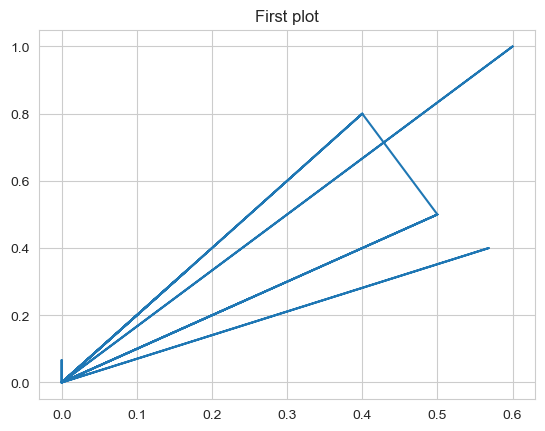

In [51]:
x= df['polarity']
y= df['subjectivety']

plt.title("First plot")
plt.plot(x,y)

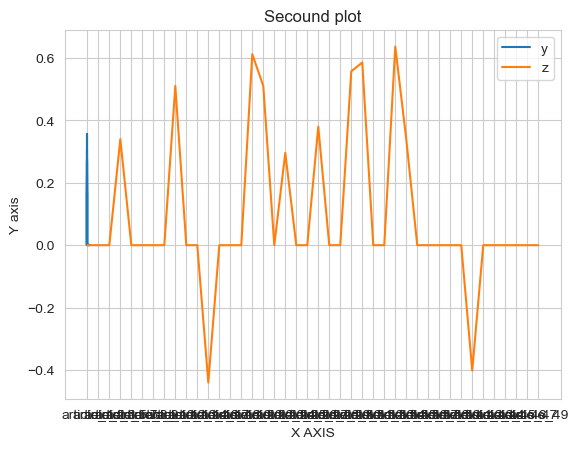

In [52]:
x=df['neg']
y=df['pos']
z=df['compound']
plt.plot(x,y,z)
plt.title("Secound plot")
plt.xlabel("X AXIS")
plt.ylabel("Y axis")
plt.legend(["y","z"])
plt.show()

<AxesSubplot:xlabel='Length', ylabel='subjectivety'>

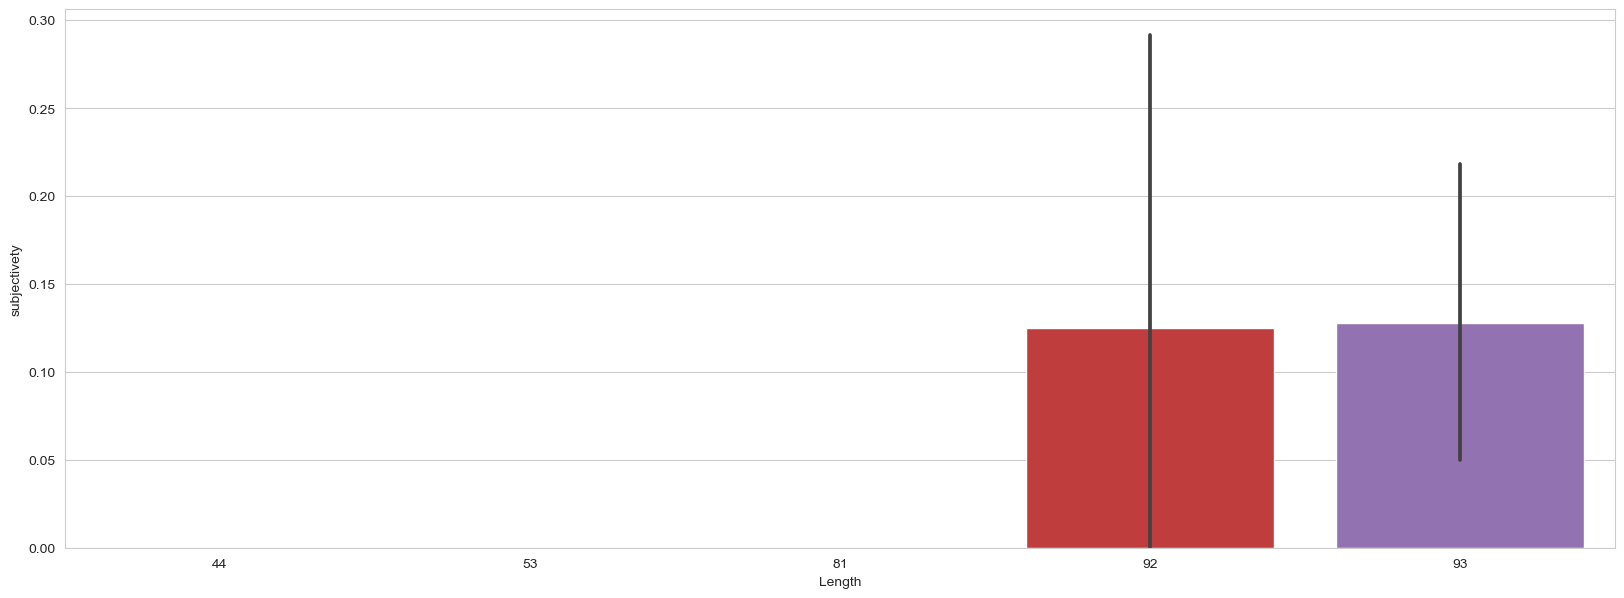

In [53]:
plt.figure(figsize=(20,7))
sns.barplot(data=df,x="Length",y="subjectivety")

<AxesSubplot:xlabel='Length', ylabel='polarity'>

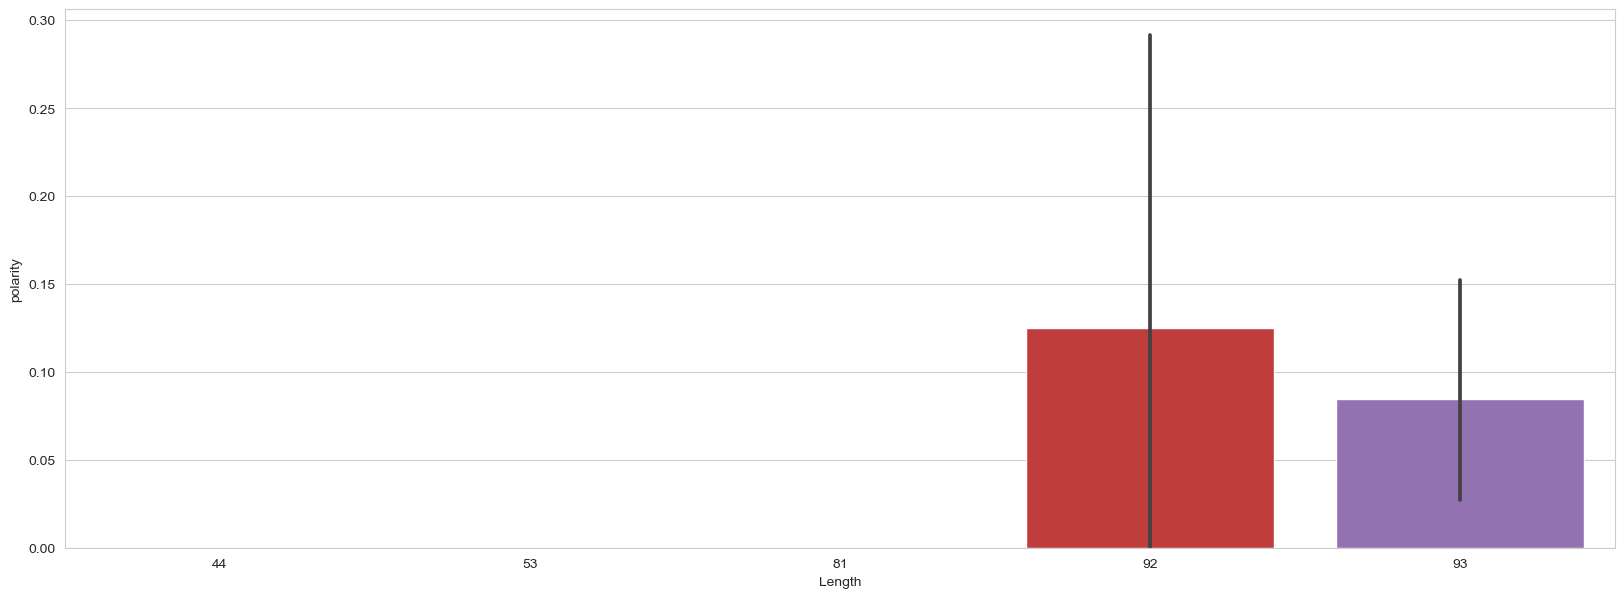

In [54]:
plt.figure(figsize=(20,7))
sns.barplot(data=df,x="Length",y="polarity")

In [ ]:
plt.figure(figsize=(15,7))
sns.displot(df[df['polarity']<0]['polarity'][:50],kde=True)
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
sns.displot(df[df['polarity']<0]['polarity'][:50],kde=False)
plt.xticks(rotation=90)
plt.figure(figsize=(15,7))
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(12,8))
df['polarity'].plot(kind='hist')
df['subjectivety'].plot(kind='hist')

In [ ]:
plt.figure(figsize=(12,8))
df['polarity'].plot(kind='box')

In [ ]:
plt.figure(figsize=(12,8))
df['subjectivety'].plot(kind='box')

In [ ]:
sns.histplot (data=df,x='polarity',hue='Label',multiple='stack')

In [ ]:
sns.displot(data=df,x='polarity',hue='Label',col='Label')

In [ ]:
sns.boxplot(x="polarity",hue="Label",data=df)
sns.despine(offset=10,trim=True)

In [ ]:
sns.pairplot(df,hue="Label")

In [ ]:
g=sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [ ]:
g=sns.PairGrid(df,hue="Label")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
ax=sns.countplot('polarity',data=df,palette='pink')
ax.set_xlabel(xlabel='x axis',fontsize=16)
ax.set_ylabel(ylabel='y axis',fontsize=16)
ax.set_title(label='Polarity',fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.countplot('Label',data=df,palette='dark')
ax.set_xlabel(xlabel='x axis',fontsize=16)
ax.set_ylabel(ylabel='y axis',fontsize=16)
ax.set_title(label=' POS /  NEG / NEU WITH RESPECT TO POLARITY',fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.style.use('classic')
ax=sns.distplot(df['Length'],color='blue')
ax.set_xlabel(xlabel='x axis',fontsize=16)
ax.set_ylabel(ylabel='y axis',fontsize=16)
ax.set_title(label='Length',fontsize=20)
plt.show()

In [ ]:
plt.style.use('dark_background')
df['Length'].value_counts().head(50).plot.bar(color='orange',figsize=(18,7))
plt.xlabel('x axis',fontsize=16)
plt.ylabel('y axis',fontsize=16)
plt.title('length',fontsize=20)
plt.show()

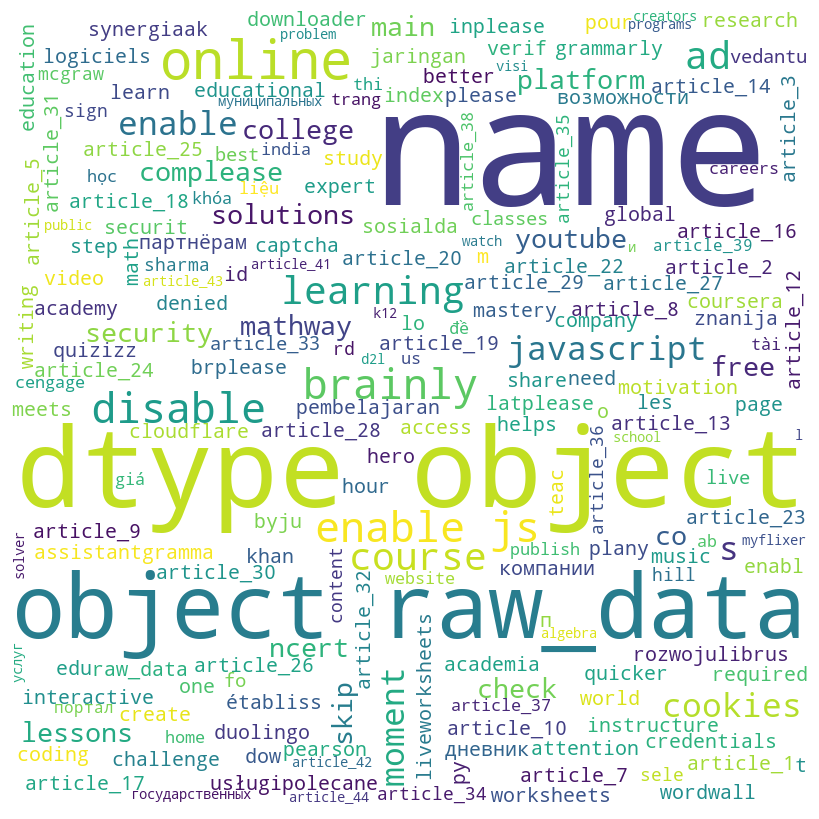

In [59]:
# Python program to generate WordCloud
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in range(len(df)):
     
    
    # typecaste each val to string
    val = str(df.iloc[val]['Raw_Data'])
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Classification

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
df.head()

In [ ]:
x = df[['polarity', 'subjectivety', 'neg', 'neu', 'pos', 'compound', 'Length']]
y = df['Label']

In [ ]:
print('Shape of data                : ',x.shape)
print('Shape of class label(target) : ',y.shape)

## Data split (80/20 ratio)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Build Classification Model using Random Forest

In [ ]:
clf.fit(x_train, y_train)

## prediction

In [ ]:
print(clf.predict([[0.25, 0.25, 0.0, 1, 0.0, 0.0, 92]]))

# Classification II 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from pandas.plotting import scatter_matrix
import sklearn
from sklearn import tree
from sklearn import datasets, model_selection
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
#split dataset into train test and validation set

X_train, x_validation, Y_train, y_validation = model_selection.train_test_split(x, y, test_size=0.2, random_state=7)

In [49]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('SVM', SVC()))

results=[]
names=[]

for name, model in models:
    kfold=model_selection .KFold(n_splits=10, random_state=7)
    cv_results=model_selection .cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

NameError: name 'LogisticRegression' is not defined

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
dt_cl=tree.DecisionTreeClassifier(max_depth=5)
dt_cl.fit(x_train, y_train)
dt_cl.score(x_test, y_test)

y_prd=dt_cl.predict(x_test)
dt_cl.score(x_test, y_test)

In [ ]:
y_prd=dt_cl.predict(x_test)
confusion_matrix(y_test, y_prd)

In [ ]:
rf_cl=ensemble.RandomForestClassifier(n_estimators=100)
rf_cl.fit(x_train, y_train)
rf_cl.score(x_test, y_test)

In [ ]:
df.to_csv('Tics_assign 4.csv')

 ### Code Ended